In [1]:
#Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import json
import re
import requests as r
import tweepy

from datetime import datetime
from functools import reduce

%matplotlib inline

In [5]:
#Note: This is only for Design purposes. You may chose to ignore this part. 
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

<h2>Gathering the Data</h2>

In [2]:
#Loading the enhanced twitter archive file into twitter1 dataframe
twitter1 = pd.read_csv('twitter-archive-enhanced.csv')
twitter1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [ ]:
#Scraping the Tweet Image Predictions file from URL hosted by Udacity server

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = r.get(url)

#Standard response format for fetching Image file in binary format using Python File operations
with open('image_predict.tsv', mode='wb') as file:
    file.write(response.content)

In [3]:
#Loading the image predictions file
images = pd.read_csv('image_predict.tsv', sep='\t')
images.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [ ]:
# Setting up the Twitter API with authentication codes
#Note: These codes can be found by signing up for Twitter Developer mode as instructed. Use your own codes here, replace the ...
consumer_key = '...'
consumer_secret = '...'
access_token = '...'
access_secret = '...'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#This parser command is of utmost importance if you want to create JSON file, 
#otherwise Jupyter throws an error that JSON is not serializable
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser()) 

In [ ]:
#Using Try-Except statement to receive data from Twitter API and capturing the missing tweet ID info. 
#Note: This process may take a long time. 

'''tweet_ids = list(twitter['tweet_id'])

tweet_data = []
tweet_id_received = []
tweet_id_missing = []

for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, 
                              tweet_mode='extended',
                              until = '2017-08-01',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        tweet_id_received.append(tweet_id)
    except:
        tweet_id_missing.append(tweet_id)
        print(tweet_id)'''

In [ ]:
#Creating a JSON text file from captured Tweet IDs data
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweet_data, file)

In [4]:
#Reading JSON text file into Twitter2 dataframe and then capturing only successful tweet IDs received and required Columns
twitter2 = pd.read_json('tweet_json.txt')
tweet_id_received = pd.read_json('tweet_json_successids.txt')
twitter2['tweet_id'] = tweet_id_received
twitter2 = twitter2[['tweet_id', 'favorite_count', 'retweet_count']]

In [ ]:
#Note: Downloaded and stored all the files in the current directory hence not running the above processes every time

<h2>Assessing the Data</h2>

In [6]:
#Here I am creating a name for each of the Dataframe. This is for better readability of presented data. 
#This is again based on personal preference. 

def df_name(df):
    d = {}
    name =[x for x in globals() if globals()[x] is df][0]
    if name == "twitter1":
        d[name] = 'Hi, I am the WeRateDogs Twitter archive dataframe'
    elif name == "twitter2":
        d[name] = "Hi, I am the Twitter Fav and Retweet Count dataframe"
    elif name == 'images':
        d[name] = "Hi, I am the Tweet Image Predictions dataframe"
        
    return(d[name])

In [7]:
#So, now we have 3 dataframe and we need to assess those. 
#First, we will get a short summary of all the 3 dataframes i.e. Twitter1, Twitter2, Images.

def info(val):
    print('\n')
    print(color.BOLD + df_name(val) + color.END, '\n')
    print(color.RED) 
    print(val.info())
    print(color.END)

info(twitter1)
info(twitter2)
info(images)



Hi, I am the WeRateDogs Twitter archive dataframe 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 no

In [8]:
#Next we will get basic statistical summary of applicable dataframes
def summ(val):
    
    if df_name(val) == 'Hi, I am the WeRateDogs Twitter archive dataframe':
        print('\n', color.BOLD + df_name(val), '\n')
        print(color.RED)
        print('Rating_numerator\n')
        print(val['rating_numerator'].describe())
        print('\nRating_denominator\n')
        print(val['rating_denominator'].describe())
        
    elif df_name(val) == 'Hi, I am the Twitter Fav and Retweet Count dataframe':
        print(color.END + "\n", color.BOLD + df_name(val), '\n')
        print(color.RED)
        print('Favorite Count\n')
        print(val.favorite_count.describe())
        print('\nRetweet Count\n')
        print(val.retweet_count.describe())

In [9]:
summ(twitter1)
summ(twitter2)


 Hi, I am the WeRateDogs Twitter archive dataframe 


Rating_numerator

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

Rating_denominator

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

 Hi, I am the Twitter Fav and Retweet Count dataframe 


Favorite Count

count      2331.000000
mean       7579.135564
std       11762.987704
min           0.000000
25%        1321.500000
50%        3298.000000
75%        9286.000000
max      156615.000000
Name: favorite_count, dtype: float64

Retweet Count

count     2331.000000
mean      2710.993994
std       4584.951888
min          1.000000
25%        548.500000
50%       1272.000000
75%       3150.000000
max      78035.000000
Nam

In [10]:
#Counting the Unique Values of each column of all the DataFrames
def valcount(val):
    print(color.END)
    print(color.BOLD + df_name(val) + color.RED, "\n")
    for i in val.columns.unique():
        print(color.END + val[i].name + color.RED, "\n")
        print(val[i].value_counts(), "\n")
        
valcount(twitter1)
valcount(twitter2)
valcount(images)


Hi, I am the WeRateDogs Twitter archive dataframe 

tweet_id 

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
                     ..
715360349751484417    1
666817836334096384    1
794926597468000259    1
673705679337693185    1
700151421916807169    1
Name: tweet_id, Length: 2356, dtype: int64 

in_reply_to_status_id 

6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
               ..
8.482121e+17    1
6.715449e+17    1
6.936422e+17    1
6.849598e+17    1
7.331095e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64 

in_reply_to_user_id 

4.196984e+09    47
2.195506e+07     2
7.305050e+17     1
2.916630e+07     1
3.105441e+09     1
2.918590e+08     1
2.792810e+08     1
2.319108e+09     1
1.806710e+08     1
3.058208e+07     1
2.625958e+07     1
1.943518e+08     1
3.589728e+08     1
8.405479e+17     1
2.894131e+09     1
2.143566e+07     1
2.281182e+09     1
1.64

tweet_id 

749075273010798592    1
671163268581498880    1
743510151680958465    1
798644042770751489    1
825120256414846976    1
                     ..
794926597468000259    1
673705679337693185    1
673342308415348736    1
754482103782404096    1
700151421916807169    1
Name: tweet_id, Length: 2331, dtype: int64 

favorite_count 

0        163
1067       3
1931       3
2452       3
2607       3
        ... 
6580       1
12012      1
12729      1
18874      1
2721       1
Name: favorite_count, Length: 1986, dtype: int64 

retweet_count 

555     6
225     5
499     5
541     4
84      4
       ..
395     1
156     1
2448    1
401     1
19      1
Name: retweet_count, Length: 1696, dtype: int64 


Hi, I am the Tweet Image Predictions dataframe 

tweet_id 

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
                     ..
816829038950027264    1
847971574464610304    1
713175907180089344    1
6703389312511508

In [11]:
#Let's find the number of NA values in each of the columns of all the Data Frames

def isna(val):
    print(color.BOLD + df_name(val), '\n')
    print("Number of NA values in the dataframes:")
    print(color.RED)
    print(val.isna().sum(), '\n')
    print(color.END)
    
isna(twitter1)
isna(twitter2)
isna(images)

Hi, I am the WeRateDogs Twitter archive dataframe 

Number of NA values in the dataframes:

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64 


Hi, I am the Twitter Fav and Retweet Count dataframe 

Number of NA values in the dataframes:

tweet_id          0
favorite_count    0
retweet_count     0
dtype: int64 


Hi, I am the Tweet Image Predictions dataframe 

Number of NA values in the dataframes:

tweet_id    0
jpg_url     0
img_num  

In [12]:
#Finding duplicate values, if any in the dataframes

def dupe(val):
    
    print('\n' + color.BOLD + df_name(val)+ '\n')
    print("Duplicate Entries in the Dataframe:")
    print(color.RED)
    print(val[val.duplicated()], '\n')
    print(color.END)
    
dupe(twitter1)
dupe(twitter2)
dupe(images)


Hi, I am the WeRateDogs Twitter archive dataframe

Duplicate Entries in the Dataframe:

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: [] 



Hi, I am the Twitter Fav and Retweet Count dataframe

Duplicate Entries in the Dataframe:

Empty DataFrame
Columns: [tweet_id, favorite_count, retweet_count]
Index: [] 



Hi, I am the Tweet Image Predictions dataframe

Duplicate Entries in the Dataframe:

Empty DataFrame
Columns: [tweet_id, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: [] 




<h2>Backup Data</h2>

In [13]:
#Create a backup before the next stage i.e. Cleaning
twitter1_back = twitter1.copy(deep=True)
twitter2_back = twitter2.copy(deep=True)
images_back = images.copy(deep=True)

#In-case of failure
#twitter1 = twitter1_back.copy(deep=True)
#twitter2 = twitter2_back.copy(deep=True)
#images = images_back.copy(deep=True)

In [14]:
twitter1.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


<h1>Quality Issues in the Datasets</h1>

<h2>Twitter Enhanced Archive Dataframe</h2>

**Visual Assessment**: 


* Data types of tweet_id and timestamp are not of the appropriate type i.e. object and datetime respectively


* Name has "None" values for some entries. These should be converted to Numpy type NaN. 


* There are many records where the ratings of dogs are inaccurate. The USP of Weratedogs is that their ratings is always on a scale of 10 and the ratings always varies from 10-14. At least that's how it's supposed to be. But there are many inconsistent ratings and they were found programatically as mentioed below. 


* There are many columns in the dataset which are either confusing or doesn't make any sense at all. These were removed. 


* Tweet data has retweets (ie. rows where retweeted_status_id and retweeted_status_user_id have a number instead of NaN). These were supposed to be discarded as only the ones with no retweets were supposed to be considered. 


**Programatic Assessment**:


* There are a few weird names for dogs such as such', 'a', 'quite', 'one', 'incredibly', 'very', 'my' etc. It might have been possible that during data extraction, there have been some inaccuracies regarding recording the data for e.g. words like "Here is.." and "This is ..." may have led to names such as 'quite', 'very' etc. 


* 1 record of a name was "O" instead of "O'Malley"


* doggo, floofer, pupper, and puppo columns have values that are the string "None" instead of NaN



* Upon further programatic assessment, it was found that inaccurate ratings can be broadly classified as:

       
       - Ratings where denominator is less than or more than 10 for e.g. 24/7, 165/160, 7/11 etc. 
       - Ratings where numerator is a multiple of the denominator for e.g. 165/150, 99/90, 144/120 etc. 
       - Ratings are actually some keywords or phrases like 24/7 or 50/50 which actually stands for a different meaning in the sentence rather than being ratings. 
       - Ratings which are decimals for e.g. 11.5/10
       - Ratings are absent.
       
       
<h2>Twitter Favorite and Retweet Count Dataframe</h2>

* There are a few missing values relative to Twitter Enhanced Archive dataframe 

<h2>Twitter Image Predictions Dataframe</h2>

* There are a few missing rows relative to Twitter Enhanced Archive dataframe


* In the predictions columns, there are many entries for dogs which are well, not dog breeds, not by a long shot. For e.g. entries like Great White shark, Desktop Computer, Barber Chair, Bakery, Academic Gown, Ice Lolly and even Triceratops. Although these are fun classifications for dogs, they should be removed from our dataframe as a good practice. 

<h1>Tidiness issues in the Datasets</h1>

* Keeping in mind the golden rules for Tidy data by Mr. Hadley Wickham, 
    
    In tidy data:
    
        Each variable forms a column.

        Each observation forms a row.

        Each type of observational unit forms a table.
        
* In Enhanced twitter archive dataframe, 1 variable (dog stage) is present in 4 different columns (doggo, floofer, pupper, and puppo)


* Twitter Favorite and Retweet count can be merged along with a few relevant columns of Enhanced Twitter Archive Dataframe and Image Predictions Dataframe to make the data tidy. 


* A separate table for all Image details like Url, image number etc. can be created to store contents of the details of images. 

<h1>Clean</h1>
<h2>Tidyness Issue #1 - One Column for all Dog types</h2>

### Define

**Issue**: 1 variable i.e. Dog Stage in 4 different columns i.e. doggo, floofer, pupper, and puppo

**Solution**: Create a new column which would act as Classifier for the Dog stage using Regex expressions. Drop the 4 columns. This also addressed the issue of "None" value present in the columns. 

In [15]:
#Finding the unique entries present in doggo, floofer, pupper, puppo columns
for i in twitter1.columns[13:]:
    print(twitter1[i].unique())

['None' 'doggo']
['None' 'floofer']
['None' 'pupper']
['None' 'puppo']


In [16]:
#Creating a New column "Doggie_Type" which would serve as 1 column to classify Dog types
twitter1['Doggie_Type'] = twitter1.text.str.extract('(doggo|floofer|pupper|puppo)')

#Check if successfully created
twitter1.Doggie_Type.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [17]:
#Dropping Individual columns
twitter1.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

<h2>Tidyness Issue #2 - Merging all the relevant Columns into two Tables to enhance readability and creating separate tables for Tweet details and Dog Classification details</h2>
    
### Define

**Issue**: All the 3 dataframes contain relevant information which should be combined in 2 separate tables to enhance readability and tidyness

**Solution**: Relevant tables were formulated as test4 and test6 dataframes and merged together on "tweet_id" column. Test4 contains details about Dog classification and Dog Types while Test6 contains information only about the tweets

In [18]:
#Merging and creating a Dataframe Test4 which will contain all dog rating details and dog classifications
test1 = twitter1[['retweeted_status_id', 'tweet_id', 'name', 'text', 'Doggie_Type', 'rating_numerator', 'rating_denominator']]
test2 = test1.merge(twitter2, on = 'tweet_id')
test3 = images[['tweet_id', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']]
test4 = test2.merge(test3, on='tweet_id')

#Merging with twitter1 so that dataframe contains only tweet details
test5 = images[['tweet_id', 'jpg_url', 'img_num']]
test6 = twitter1.merge(test5, on='tweet_id')
#This takes care of the condition where we only want original ratings (no retweets) that "have images".
test6.jpg_url.isnull().sum()

0

In [19]:
#Dropping unwanted columns in Test6 so that it contains only Tweet related details
test6.drop(['text', 'rating_numerator', 'rating_denominator', 'name', 'Doggie_Type'], axis=1, inplace=True)

<h2>Quality Issues #1 - Dataframe contains retweets and not only original ratings</h2>

### Define

**Issue**: The dataframes contain retweets and not original ratings

**Solution**: The rows with the retweets were removed to only have original data in the dataframes

In [20]:
#Checking Index Values for entries in Test6 where retweet ids are present or not missing. 
test6[pd.notnull(test6.retweeted_status_id)].index.values

array([  19,   33,   68,   82,  110,  130,  134,  171,  172,  187,  210,
        216,  227,  230,  239,  264,  270,  271,  285,  319,  328,  332,
        338,  347,  356,  357,  362,  371,  375,  381,  391,  422,  429,
        434,  438,  440,  447,  450,  455,  459,  469,  473,  480,  481,
        482,  483,  484,  485,  486,  495,  503,  505,  510,  533,  536,
        552,  564,  579,  587,  598,  599,  611,  618,  621,  628,  647,
        657,  661,  667,  687,  706,  710,  725,  729,  741,  744,  759,
        777, 1037, 1979, 1980], dtype=int64)

In [21]:
#Checking Index Values for entries in Test4 where retweet ids are present or not missing. 
test4[pd.notnull(test4.retweeted_status_id)].index.values

array([  32,   67,  107,  130,  167,  182,  209,  220,  223,  255,  261,
        262,  276,  309,  318,  322,  328,  337,  346,  347,  352,  361,
        365,  371,  381,  412,  419,  424,  428,  430,  437,  440,  445,
        458,  462,  469,  470,  471,  472,  473,  474,  475,  484,  492,
        494,  499,  522,  525,  541,  553,  568,  576,  587,  588,  599,
        606,  609,  616,  635,  645,  654,  674,  693,  697,  715,  727,
        730,  745,  762, 1022, 1963, 1964], dtype=int64)

In [22]:
#Writing a function to remove the rows of retweets
def remove_retweet(val):
    lst = []
    for i in val[pd.notnull(val.retweeted_status_id)].index.values:
        lst.append(i)

    val.drop(lst, axis = 0, inplace=True)

remove_retweet(test4)
remove_retweet(test6)

In [23]:
#Checking if retweets rows were successfully removed
print(test6[pd.notnull(test6.retweeted_status_id)].index.values)
print(test4[pd.notnull(test4.retweeted_status_id)].index.values)

[]
[]


<h2>Quality Issues #2 - Remove Less Useful columns from the Dataframes</h2>

### Define

**Issue**: The dataframes which contain columns having irrelevant information needs to be removed

**Solution**: The columns were removed from the dataframes accordingly using 'drop' command

In [24]:
#Removing less useful columns
test6.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', \
            'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True, axis=1)
test4.drop(['retweeted_status_id'], inplace=True, axis=1)

In [25]:
test6.set_index('tweet_id')
test4.set_index('tweet_id')
test6.head(1)

,tweet_id,timestamp,source,expanded_urls,jpg_url,img_num
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1


In [26]:
#Creating necessary CSVs of the tidied tables
test6.to_csv('twitter_archive_master.csv', index=False)
test4.to_csv('twitter_archive_master_2.csv', index=False)

<h2>Quality issue #3 - tweet_id data type is an integer</h2>

### Define

**Issue**: Datatype of tweet_id is integer

**Solution**: Change tweet_id to string datatype

In [27]:
#Changing the required datatype of tweet_id to string
test6['tweet_id'] = test6['tweet_id'].astype(str)
test4['tweet_id'] = test4['tweet_id'].astype(str)

In [28]:
#Checking if the datatypes have been changed
print(color.BOLD)
print(test6.info())
print("\n")
print(test4.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       1994 non-null   object
 1   timestamp      1994 non-null   object
 2   source         1994 non-null   object
 3   expanded_urls  1994 non-null   object
 4   jpg_url        1994 non-null   object
 5   img_num        1994 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 109.0+ KB
None


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2058
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1987 non-null   object 
 1   name                1987 non-null   object 
 2   text                1987 non-null   object 
 3   Doggie_Type         324 non-null    object 
 4   rating_numerator    1987 non-null   int64  
 5   rating_denominator  1987 non-null  

<h2>Quality issue #4 - Timestamp data type is not Datetime</h2>

### Define

**Issue**: Datatype of Timestamp is integer

**Solution**: Change Timestamp to Datetime datatype

In [29]:
#Changing Datatype of timestamp to Datetime
test6['timestamp'] = pd.to_datetime(test6['timestamp'])

In [30]:
#Checking if changes were made
test6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       1994 non-null   object             
 1   timestamp      1994 non-null   datetime64[ns, UTC]
 2   source         1994 non-null   object             
 3   expanded_urls  1994 non-null   object             
 4   jpg_url        1994 non-null   object             
 5   img_num        1994 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 109.0+ KB


<h2>Quality issue #5 - Name column contains "None" values</h2>

### Define

**Issue**: Name Column of test4 dataframe contains "None" values

**Solution**: Convert these "None" values to "NaN" standard format

In [31]:
#Checking which rows have "None" entries in the Name column
test4[test4['name'] == "None"]

,tweet_id,name,text,Doggie_Type,rating_numerator,rating_denominator,favorite_count,retweet_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
5,891087950875897856,None,Here we have a majestic great white breaching ...,NaN,13,10,19045,2849,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
7,890729181411237888,None,When you watch your owner call another dog a g...,NaN,13,10,61151,17238,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
12,889665388333682689,None,Here's a puppo that seems to be on the fence a...,puppo,13,10,45140,9150,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
23,887343217045368832,None,You may not have known you needed to see this ...,NaN,13,10,31631,9566,Mexican_hairless,0.330741,True,sea_lion,0.275645,False,Weimaraner,0.134203,True
24,887101392804085760,None,This... is a Jubilant Antarctic House Bear. We...,NaN,12,10,28774,5451,Samoyed,0.733942,True,Eskimo_dog,0.035029,True,Staffordshire_bullterrier,0.029705,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,666082916733198337,None,Here we have a well-established sunblockerspan...,NaN,6,10,103,41,pug,0.489814,True,bull_mastiff,0.404722,True,French_bulldog,0.048960,True
2046,666073100786774016,None,Let's hope this flight isn't Malaysian (lol). ...,NaN,10,10,298,147,Walker_hound,0.260857,True,English_foxhound,0.175382,True,Ibizan_hound,0.097471,True
2047,666071193221509120,None,Here we have a northern speckled Rhododendron....,NaN,9,10,136,53,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True
2054,666049248165822465,None,Here we have a 1949 1st generation vulpix. Enj...,NaN,5,10,96,39,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [32]:
#Replacing "None" entries with standard NaN values
test4['name'].replace('None', np.nan, inplace = True)

In [33]:
#Checking whether None values have been removed
test4[test4['name'] == "None"]

,tweet_id,name,text,Doggie_Type,rating_numerator,rating_denominator,favorite_count,retweet_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


<h2>Quality Issue #6 - Name column has Lowercase invalid values</h2>

### Define

**Issue**: Name Column has some Lowercase values which seem to be invalid for Dog Names

**Solution**: Replace these lowercase values to standard NaN format


In [34]:
#Searching for all the values witth Lowercase entries
lst = []
for i in test4.name.unique():
       if str(i).islower() == True:
        lst.append(i)
print(lst)

[nan, 'such', 'a', 'quite', 'one', 'incredibly', 'very', 'my', 'not', 'his', 'an', 'just', 'getting', 'this', 'unacceptable', 'all', 'infuriating', 'the', 'actually', 'by', 'officially', 'light', 'space']


In [35]:
#These entries don't look like names so replacing them with standard NaN value
test4['name'].replace(lst, np.nan, inplace = True)

In [36]:
#Checking if the Lowercase values have been removed
print(test4.name.unique())

['Phineas' 'Tilly' 'Archie' 'Darla' 'Franklin' nan 'Jax' 'Zoey' 'Cassie'
 'Koda' 'Bruno' 'Ted' 'Stuart' 'Oliver' 'Jim' 'Zeke' 'Ralphus' 'Gerald'
 'Jeffrey' 'Canela' 'Maya' 'Mingus' 'Derek' 'Roscoe' 'Waffles' 'Jimbo'
 'Maisey' 'Earl' 'Lola' 'Kevin' 'Yogi' 'Noah' 'Bella' 'Grizzwald' 'Rusty'
 'Gus' 'Stanley' 'Alfy' 'Koko' 'Rey' 'Gary' 'Elliot' 'Louis' 'Jesse'
 'Romeo' 'Bailey' 'Duddles' 'Jack' 'Steven' 'Beau' 'Snoopy' 'Shadow'
 'Emmy' 'Aja' 'Penny' 'Dante' 'Nelly' 'Ginger' 'Benedict' 'Venti' 'Goose'
 'Nugget' 'Cash' 'Jed' 'Sebastian' 'Sierra' 'Monkey' 'Kody' 'Lassie'
 'Rover' 'Napolean' 'Boomer' 'Cody' 'Rumble' 'Clifford' 'Dewey' 'Scout'
 'Gizmo' 'Walter' 'Cooper' 'Harold' 'Shikha' 'Lili' 'Jamesy' 'Coco'
 'Sammy' 'Meatball' 'Paisley' 'Albus' 'Neptune' 'Belle' 'Quinn' 'Zooey'
 'Dave' 'Jersey' 'Hobbes' 'Burt' 'Lorenzo' 'Carl' 'Jordy' 'Milky'
 'Trooper' 'Sophie' 'Wyatt' 'Rosie' 'Thor' 'Oscar' 'Callie' 'Cermet'
 'Marlee' 'Arya' 'Einstein' 'Alice' 'Rumpole' 'Benny' 'Aspen' 'Jarod'
 'Wiggles' '

<h2>Quality Issue #7 - Name column has an invalid entry for Name</h2>

### Define

**Issue**: Name Column has an invalid entry as "O" because the original name is different

**Solution**: Replace the invalid value with the appropriate value from text column

In [37]:
#Searching all entries with less than 3 characters in name field
lst = []
for i in test4.name.unique():
       if len(str(i)) < 3:
        lst.append(i)
print(lst)

['Mo', 'Bo', 'O', 'Al', 'Ed', 'JD', 'Jo']


In [38]:
#Checking whether these are actually names or some mistake in Data extraction
print(test4[test4['name'] == "O"].text.values[0])
print(test4[test4['name'] == "Mo"].text.values[0])
print(test4[test4['name'] == "Bo"].text.values[0])
print(test4[test4['name'] == "Al"].text.values[0])
print(test4[test4['name'] == "Ed"].text.values[0])
print(test4[test4['name'] == "JD"].text.values[0])
print(test4[test4['name'] == "Jo"].text.values[0])

This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC
This is Mo. No one will push him around in the grocery cart. He's quite pupset about it. 11/10 I volunteer https://t.co/feNwTq12S5
This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1
Meet Al Cabone. He's a gangsta puppa. Rather h*ckin ruthless. Shows no mercy sometimes. 11/10 pet w extreme caution https://t.co/OUwWbEKOUV
This is Ed. He's not mad, just disappointed. 10/10 https://t.co/BIljU0zhLN
This is JD (stands for "just dog"). He's like Airbud but with trading card games instead of sports. 10/10 much skill https://t.co/zzueJV9jCF
This is Jo. Jo is a Swedish Queso. Tongue bigger than face. Tiny lil legs. Still no seatbelt. Simply careless. 8/10 https://t.co/Edy7B5vOp2


In [39]:
#Manually replacing the incorrect entries with the correct entries
test4['name'].replace('O', 'O\'Malley', inplace = True)
test4['name'].replace('Al', 'Al Cabone', inplace = True)

In [40]:
#Checking whether correct replacements have been made
test4[test4['name'] == "O'Malley"]

,tweet_id,name,text,Doggie_Type,rating_numerator,rating_denominator,favorite_count,retweet_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
613,776201521193218049,O'Malley,This is O'Malley. That is how he sleeps. Doesn...,NaN,10,10,9778,2551,Rottweiler,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True


In [41]:
test4[test4['name'] == "Al Cabone"]

,tweet_id,name,text,Doggie_Type,rating_numerator,rating_denominator,favorite_count,retweet_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
652,770414278348247044,Al Cabone,Meet Al Cabone. He's a gangsta puppa. Rather h...,NaN,11,10,6398,2126,maillot,0.580528,False,maillot,0.081449,False,golden_retriever,0.05357,True


<h2>Quality Issue #8 - No Separate Column for Rating</h2>

### Define

**Issue**: There is no separate column for 'Rating' which would provide better readability

**Solution**: Create a new column "Rating" which is a combined column of Rating_numerator and Rating_denominator

In [42]:
#Creating a new column "Rating" in Column #6
test4.insert(6, 'rating', (test4.rating_numerator.astype('str') + "/" + test4.rating_denominator.astype('str')))

In [43]:
#Checking whether the column has been created successfully
test4.head(1)

,tweet_id,name,text,Doggie_Type,rating_numerator,rating_denominator,rating,favorite_count,retweet_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,Phineas,This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,13/10,36289,7723,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


<h2>Quality Issue #9 - Inaccuracies in Ratings where denominator is not equal to 10</h2>

### Define

**Issue**: There are some inconsistencies in the ratings where the denominator is not equal to 10

**Solution**: First extract the rows where rating denominator is not equal to 10, then extract the correct rating using Regex from text column and replace in the main dataframe. Remove the unwanted columns. 

In [44]:
#Checking all the unique numerator values
test4.rating_numerator.unique()

array([  13,   12,   14,    5,   11,    6,   10,    0,   84,   24,   75,
         27,    3,    7,    8,    9,    4,  165, 1776,  204,   50,   99,
         80,   45,   60,   44,  143,  121,   26,    2,  144,   88,    1,
        420], dtype=int64)

In [45]:
#Checking all the unique denominator values
test4.rating_denominator.unique()

array([ 10,  70,   7, 150,  11, 170,  20,  50,  90,  80,  40, 130, 110,
       120,   2], dtype=int64)

In [46]:
#Using Regex to search for the entries where ratings are 3 digit entries or 2 digit entries
lst = []
ls2 = []
for i in test4[test4.rating_denominator != 10].text:
    try:
        x = re.search("\\d\d\d/\d\d\d", i) or re.search("\\d\d/\d\d", i)
        a, b = x.span()
        ls2.append(i)
        lst.append(str.split((i[a:b]), sep='/'))
    except:
        pass

In [47]:
#Checking which entries are having mistakes
print(ls2)
#The error entries have been captured as:
print(lst)

['The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd', 'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE', 'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ', 'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv', 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a', 'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq', "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1", "Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12", 'From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK

In [48]:
#Replacing the invalid entries with following logic: 
#Here we have assumed that the entries with 3 digit entries are higher order terms that can be reduced to get the correct rating
#Hence, dividing the denominator with 10 and numerator with the resulting denominator
ls3 = []
j = 0
for i in range(0, len(lst)):
        m = int(lst[i][j+1])/10
        n = int(int(lst[i][j])/m)
        ls3.append(str(n) + '/' + str(10))

In [49]:
#We have collected the correct ratings now
ls3

['12/10',
 '11/10',
 '14/10',
 '12/10',
 '13/10',
 '10/10',
 '11/10',
 '10/10',
 '9/10',
 '12/10',
 '11/10',
 '11/10',
 '11/10',
 '10/10',
 '12/10',
 '11/10']

In [50]:
#Now we will replace the incorrect ratings for e.g. 
test4[test4.text ==  "IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq"].rating.values[0]

'144/120'

In [51]:
#Collecting the index values of the invalid entries which will be replaced
ls5 = []
for i in ls2: 
    ls5.append(test4[test4.text ==  i].index.values[0])

In [52]:
#Replacing using loc the incorrect entries
for j in range(0, len(ls3)): 
    for i in ls5:
        test4.loc[i, 'rating'] = ls3[j]
        j += 1
    break

In [53]:
#Checking if the ratings have been replaced successfully
for i in ls5:
        print(test4.loc[i, 'rating'])

12/10
11/10
14/10
12/10
13/10
10/10
11/10
10/10
9/10
12/10
11/10
11/10
11/10
10/10
12/10
11/10


<h2>Quality Issue #10 - Inaccuracies in Ratings where numerator is less than 10</h2>

### Define

**Issue**: There are some inconsistencies in the ratings where the numerator is less than 10

**Solution**: First extract the rows where rating numerator is less than 10, then extract the correct rating using Regex from text column and replace in the main dataframe. Remove the unwanted columns. 

In [54]:
#Using Regex to search for the entries where ratings are 3 digit entries or 2 digit entries
lst = []
ls2 = []
for i in test4[test4.rating_numerator < 10].text:
    try:
        x = re.search("\\d\d\d/\d\d\d", i) or re.search("\\d\d/\d\d", i)
        a, b = x.span()
        ls2.append(i)
        lst.append(str.split((i[a:b]), sep='/'))
    except:
        pass

In [55]:
#The entries are:
print(ls2)
print(lst)

['After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ', 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a', "This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P", "When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM", 'This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5', "Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https://t.co/U36HYQIijg"]
[['14', '10'], ['13', '10'], ['13', '10'], ['10', '10'], ['10', '10'], ['11', '10']]


In [56]:
#Replacing 6th entry manually
lst[5] = ['8', '10']

In [57]:
#Extracting the index values of the default
ls5 = []
for i in ls2: 
    ls5.append(test4[test4.text ==  i].index.values[0])
ls5

[863, 954, 1216, 1256, 1392, 1678]

In [58]:
for i in ls5:
        print(test4.loc[i, 'rating'])

14/10
13/10
4/10
5/10
10/10
8/10


In [59]:
#Replacing the 2 index rows with the correct ratings
test4.loc[1216, 'rating'] = str(13) + '/' + str(10)
test4.loc[1256, 'rating'] = str(10) + '/' + str(10)

In [60]:
#Checking whether the values have been updated successfully
for i in ls5:
        print(test4.loc[i, 'rating'])

14/10
13/10
13/10
10/10
10/10
8/10


<h2>Quality Issue #11 - Inconsistent ratings with Decimal Ratings present</h2>

### Define

**Issue**: There are some inconsistencies in the ratings where the ratings are in decimal format

**Solution**: Manually Remove all the entries from Data frame as the entries are fewer in number

In [61]:
#Decimal ratings where numerator is not equal to 10
lst = []
ls2 = []
for i in test4[test4.rating_numerator != 10].text:
    try:
        x = re.search("\\d\.\d/\d\d", i) or re.search("\\d.\d\d/\d\d", i)
        a, b = x.span()
        ls2.append(i)
        lst.append(str.split((i[a:b]), sep='/'))
    except:
        pass

In [62]:
print(ls2)
print(lst)

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948', "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS", "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq", "This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh", 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']
[['3.5', '10'], ['9.75', '10'], ['1.27', '10'], ['1776', '10'], ['1.26', '10']]


In [63]:
#Extracting the index of the incorrect ratings
ls5 = []
for i in ls2: 
    ls5.append(test4[test4.text ==  i].index.values[0])
ls5

[40, 548, 603, 789, 1438]

In [64]:
#Replacing the ratings with the correct values
test4.loc[40, 'rating'] = str(13.5) + '/' + str(10)
test4.loc[603, 'rating'] = str(11.27) + '/' + str(10)
test4.loc[789, 'rating'] = str(11.26) + '/' + str(10)

In [65]:
#Testing whether the replacement has been made correctly
test4.loc[40, 'rating']

'13.5/10'

<h2>Note: The following section is just a FYI. The cleaning operation has not been taken up in this exercise</h2>

<h2>Quality Issue - Inconsistent ratings which violate the policy of WerateDogs</h2>

### Define

**Issue**: There are still some inconsistencies in the ratings which violate the rating system of WeRateDogs

**Solution**: This is outside the scope of this exercise

In [66]:
#Identifying the offending ratings
test4.rating.unique()

array(['13/10', '12/10', '14/10', '13.5/10', '11/10', '6/10', '10/10',
       '0/10', '24/7', '75/10', '5/10', '11.27/10', '3/10', '7/10',
       '8/10', '9/10', '4/10', '11.26/10', '26/10', '2/10', '1/10',
       '420/10', '1/2'], dtype=object)

In [67]:
#Some texts do have ratings
test4[test4.rating == '1/2'].text.values

array(['This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'],
      dtype=object)

In [68]:
#While some do not
print(test4[test4.rating == '0/10'].text.values, "\n")
print(test4[test4.rating == '24/7'].text.values)

["When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag"
 "PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX"] 

['Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx']


<h1>Bonus part</h1>
<h2>Quality Issue - Classification of Dogs is incorrect for some entries with some very weird values</h2>

### Define

**Issue**: There are some dogs which are classfied incorrectly as Barber Chair, Great White Shark among others. 

**Solution**: 

Part1: Find the NAD (Not-A-Dog) entries by comparing with Dog database from Kaggle

Part2: Replace NAD entries with NAN
              
Part3: Join All columns(p1, p2, p3) to get a beautiful tidy table

In [69]:
#First we combine all the "Dog Breeds" in the table which includes the NAD values

arr = []

for i in images.p1.unique():
    arr.append(i.upper())
for i in images.p2.unique():
    arr.append(i.upper())
for i in images.p3.unique():
    arr.append(i.upper())
    
arr = pd.DataFrame(arr, columns=['breed']) 
arr = arr.breed.unique()
arr = (sorted(arr))

In [70]:
#We can start to see some weird values already
arr

['ABAYA',
 'ACADEMIC_GOWN',
 'ACCORDION',
 'ACORN',
 'ACORN_SQUASH',
 'AFFENPINSCHER',
 'AFGHAN_HOUND',
 'AFRICAN_CHAMELEON',
 'AFRICAN_CROCODILE',
 'AFRICAN_GREY',
 'AFRICAN_HUNTING_DOG',
 'AGAMA',
 'AIREDALE',
 'ALP',
 'AMERICAN_ALLIGATOR',
 'AMERICAN_BLACK_BEAR',
 'AMERICAN_STAFFORDSHIRE_TERRIER',
 'ANGORA',
 'APPENZELLER',
 'APRON',
 'ARABIAN_CAMEL',
 'ARCTIC_FOX',
 'ARMADILLO',
 'ASHCAN',
 'ASSAULT_RIFLE',
 'AUSTRALIAN_TERRIER',
 'AXOLOTL',
 'BADGER',
 'BAGEL',
 'BAKERY',
 'BALANCE_BEAM',
 'BALD_EAGLE',
 'BALLOON',
 'BALLPLAYER',
 'BANANA',
 'BANDED_GECKO',
 'BAND_AID',
 'BANNISTER',
 'BARBELL',
 'BARBERSHOP',
 'BARBER_CHAIR',
 'BARRACOUTA',
 'BARREL',
 'BARROW',
 'BASENJI',
 'BASKETBALL',
 'BASSET',
 'BASSINET',
 'BATHING_CAP',
 'BATHTUB',
 'BATH_TOWEL',
 'BEACH_WAGON',
 'BEACON',
 'BEAGLE',
 'BEARSKIN',
 'BEAVER',
 'BEDLINGTON_TERRIER',
 'BEE_EATER',
 'BELL_COTE',
 'BERNESE_MOUNTAIN_DOG',
 'BIB',
 'BIGHORN',
 'BINDER',
 'BINOCULARS',
 'BIRDHOUSE',
 'BISON',
 'BLACK-AND-TAN_COONH

### Next we download the Datasets found from Kaggle and Github using Response and URL
### I am using a locally download file, you can do the steps from the below URL:
        *https://github.com/paiv/fci-breeds
        *https://www.kaggle.com/c/dog-breed-identification

In [71]:
#Extracting the dataframe in doggies dataframe and replacing whitespaces with "_"
doggies = pd.read_csv('2017.csv')
doggies = pd.DataFrame({'breed':doggies.Breed.unique()})
lst = []
for i in doggies.breed.unique():
    lst.append(str(i).replace(" ", "_"))

In [72]:
#These are the dog breeds from the dataset
lst

['BICHON_FRISE',
 'CHIHUAHUA',
 'LAB_MIX',
 'DACHSHUND',
 'TERRIER',
 'GER_SHEPHERD',
 'SCHNOODLE',
 'LABRADOR_RETRIEVER',
 'SHIH_TZU',
 'OLD_ENG_SHEEPDOG',
 'MALTESE',
 'MIXED',
 'CHIHUAHUA_MIX',
 'BOXER_MIX',
 'GER_SHEPHERD_MIX',
 'AM_PIT_BULL_TERRIER',
 'COCKER_SPANIEL',
 'ENG_SPRINGER_SPANIE',
 'BEAGLE',
 'GOLDEN_RETRIEVER',
 'COCKER_SPANIEL_MIX',
 'W_HGHLND_WH_TERRIER',
 'GOLDENDOODLE',
 'LHASA_APSO',
 'PARSON_RUSSELL_TERR',
 'SIB_HUSKY',
 'BORD_COLLIE',
 'BRITTANY_SPANIEL',
 'BOSTON_TERRIER',
 'VIZSLA',
 'BEAGLE_MIX',
 'LABRADOODLE',
 'AIREDALE_TERRIER',
 'PEKINGESE',
 'YORKSHIRE_TERRIER',
 'WEIMARANER',
 'WELSH_CORGI_PEMBROK',
 'AM_ESKIMO_DOG',
 'BOXER',
 'COCKAPOO',
 'BASSET_HOUND',
 'LHASA_APSO_MIX',
 'AKITA',
 'BORD_COLLIE_MIX',
 'SHIH_TZU_MIX',
 'GREYHOUND',
 'WELSH_CORGI_CARDIGA',
 'HOUND_MIX',
 'ENG_COCKER_SPANIEL',
 'POODLE_MIN',
 'FOX_TERRIER_WIRE',
 'DOBERMAN_PINSCHER',
 'TREE_WALK_COONHOUND',
 'RETRIEVER_MIX',
 'SHETLAND_SHEEPDOG',
 'SHIBA_INU',
 'COLLIE_MIX',
 'DOBERM

In this dataset, there are some entries like 'GER_SHEPHERD' which are in short form, we need the full names for our purposes
so on to the next dataset


In [73]:
#The next dataset named labels is loaded
#The entries are converted into a Dataframe which is then merged with the previous dataset
label = pd.read_csv('labels.csv')
label.breed = label.breed.str.upper()
lst = pd.DataFrame({'breed':lst})
db = pd.concat([label, lst])

#creating the master database
db_breed = pd.DataFrame({'All_Breeds':db.breed.unique()})
db_breed.All_Breeds = sorted(db_breed.All_Breeds)

In [74]:
#Now we have the master database
db_breed

,All_Breeds
0,.
1,AFFENPINSCHER
2,AFGHAN_HOUND
3,AFRICAN_HUNTING_DOG
4,AIREDALE
...,...
336,WIREHAIR_PT_GRIFFON
337,W_HGHLND_WH_TERRIER
338,W_SHEPHERD_/GER_SHEPH
339,YORKSHIRE_TERRIER


In [75]:
#Now we will check the Dog breeds in our dataframe and compare it with the master database to extract Dog breeds and NADs
present = []
missing = []
count = 0
for i in arr:
    if i in list(db_breed.All_Breeds):
        present.append(i)
    else:
        missing.append(i)

In [76]:
#Printing the correct Dog Breeds in our dataset compared with the master DB
print(color.BOLD + "These are all the correct Dog Breeds in our Dataset")
print(color.RED)
for i in sorted(present):
    print("**", i, end='\n')

These are all the correct Dog Breeds in our Dataset

** AFFENPINSCHER
** AFGHAN_HOUND
** AFRICAN_HUNTING_DOG
** AIREDALE
** AMERICAN_STAFFORDSHIRE_TERRIER
** APPENZELLER
** AUSTRALIAN_TERRIER
** BASENJI
** BASSET
** BEAGLE
** BEDLINGTON_TERRIER
** BERNESE_MOUNTAIN_DOG
** BLACK-AND-TAN_COONHOUND
** BLENHEIM_SPANIEL
** BLOODHOUND
** BLUETICK
** BORDER_COLLIE
** BORDER_TERRIER
** BORZOI
** BOSTON_BULL
** BOUVIER_DES_FLANDRES
** BOXER
** BRABANCON_GRIFFON
** BRIARD
** BRITTANY_SPANIEL
** BULL_MASTIFF
** CAIRN
** CARDIGAN
** CHESAPEAKE_BAY_RETRIEVER
** CHIHUAHUA
** CHOW
** CLUMBER
** COCKER_SPANIEL
** COLLIE
** CURLY-COATED_RETRIEVER
** DALMATIAN
** DANDIE_DINMONT
** DHOLE
** DINGO
** DOBERMAN
** ENGLISH_FOXHOUND
** ENGLISH_SETTER
** ENGLISH_SPRINGER
** ENTLEBUCHER
** ESKIMO_DOG
** FLAT-COATED_RETRIEVER
** FRENCH_BULLDOG
** GERMAN_SHEPHERD
** GERMAN_SHORT-HAIRED_POINTER
** GIANT_SCHNAUZER
** GOLDEN_RETRIEVER
** GORDON_SETTER
** GREATER_SWISS_MOUNTAIN_DOG
** GREAT_DANE
** GREAT_PYRENEES
** G

In [77]:
#Printing the incorrect entries
print(color.BOLD + "And here are all the NAD entries, take some time to read through them, some are really funny")
miss = np.array(missing)
for i in np.unique(sorted(miss)):
    print(color.RED)
    print("**", i, end='')

And here are all the NAD entries, take some time to read through them, some are really funny

** ABAYA
** ACADEMIC_GOWN
** ACCORDION
** ACORN
** ACORN_SQUASH
** AFRICAN_CHAMELEON
** AFRICAN_CROCODILE
** AFRICAN_GREY
** AGAMA
** ALP
** AMERICAN_ALLIGATOR
** AMERICAN_BLACK_BEAR
** ANGORA
** APRON
** ARABIAN_CAMEL
** ARCTIC_FOX
** ARMADILLO
** ASHCAN
** ASSAULT_RIFLE
** AXOLOTL
** BADGER
** BAGEL
** BAKERY
** BALANCE_BEAM
** BALD_EAGLE
** BALLOON
** BALLPLAYER
** BANANA
** BANDED_GECKO
** BAND_AID
** BANNISTER
** BARBELL
** BARBERSHOP
** BARBER_CHAIR
** BARRACOUTA
** BARREL
** BARROW
** BASKETBALL
** BASSINET
** BATHING_CAP
** BATHTUB
** BATH_TOWEL
** BEACH_WAGON
** BEACON
** BEARSKIN
** BEAVER
** BEE_EATER
** BELL_COTE
** BIB
** BIGHORN
** BINDER
** BINOCULARS
** BIRDHOUSE
** BISON
** BLACK-FOOTED_FERRET
** BLACK_SWAN
** BLACK_WIDOW
** BOATHOUSE
** BOBSLED
** BOLETE
** BONNET
** BOOKCASE
** BOOKSHOP
** BOOK_JACKET
** BOW
** BOW_TIE
** BOX_TURTLE
** BRASS
** BREAKWATER
** BREASTPLATE
** B

** WASHER
** WATER_BOTTLE
** WATER_BUFFALO
** WEASEL
** WEB_SITE
** WHIPTAIL
** WHITE_WOLF
** WIG
** WILD_BOAR
** WINDOW_SCREEN
** WINDOW_SHADE
** WINDSOR_TIE
** WING
** WOK
** WOLF_SPIDER
** WOMBAT
** WOODEN_SPOON
** WOOD_RABBIT
** WOOL
** WRECK
** ZEBRA

<h2>Now the fun part is over, let's get back to business. </h2>

### We can use 2 methods to replace the values in the table:

### 1. Use the Query method to find which entries have p1_dog, p2_dog or p3_dog as False like so:
    test4.query('p1_dog==True and p2_dog==True and p3_dog==True')
    
  ### And remove those entries


### 2. Or use my newly found Database(AKA Super-power) to 'dig' out the bad entries. 
    
   ### I am going to go for the second 
    
    A. Because I worked hard to make the database and my efforts would go in vain :P
    B. Because I am confident that my database is rock-solid(again long hours going through the entries) :D
    C. Because this is my notebook B)

In [78]:
#Sort the values in Non-Dog breed list and store in miss
miss = np.unique(sorted(miss))

In [79]:
#Creating a backup because you never know
test4_1 = test4.copy(deep=True)

In [80]:
#Convert all Entries of p1, p2, p3 columns to Upper Case to maintain consistency
test4.p1 = test4.p1.str.upper()
test4.p2 = test4.p2.str.upper()
test4.p3 = test4.p3.str.upper()

In [81]:
#Function to replace the weird values with NaN
def replace_nad(val):
    for i in miss:
        if i in test4[val].values:
            #print (test4[test4[val] == i].index.values[0])
            ind = test4[test4[val] == i].index.values[0]
            test4.loc[ind, val] = np.NaN

In [82]:
replace_nad('p1')
replace_nad('p2')
replace_nad('p3')

In [83]:
#Now creating a column which will contain all the Dog Breeds
test4['Dog_Breed']= test4.p1 + "||" + test4.p2 + "||" + test4.p3

<p>Note: We can use the Melt function to create the column Dog_breed as one long column containing all the individual values of dog breeds. 
    
<br>It will only increase the number of rows and create an extended dataframe.

<br>I have not chosen to do that because it will unnecessary create a lot of rows and also because the dog breeds classified aren't absolute but has an attached probability to it. 
    
<br>On that note, we can use the p1_conf, p2_conf, p3_conf to keep records with the maximum probability of classification but then there are classification with highest probability which are not dog breeds at all. 

<br>There are 2 dog breeds CARDIGAN and NEWFOUNDLAND which might seem as misclassfication but these are actual classified Dog breeds in the official Dog breed database
    
</p>

<h2>Visualisation Part</h2>

In [84]:
#Creating Wordcloud with most frequent names for Dogs

In [85]:
#Creating a Text list which will be used for Word Cloud
text = []
for i in test4.name.values:
    if i != np.nan: 
        text.append(i)
text = ' '.join(map(str, text)) 

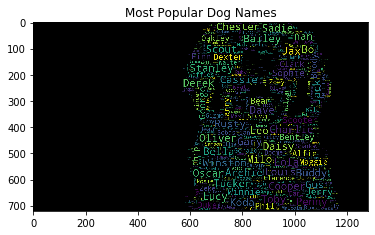

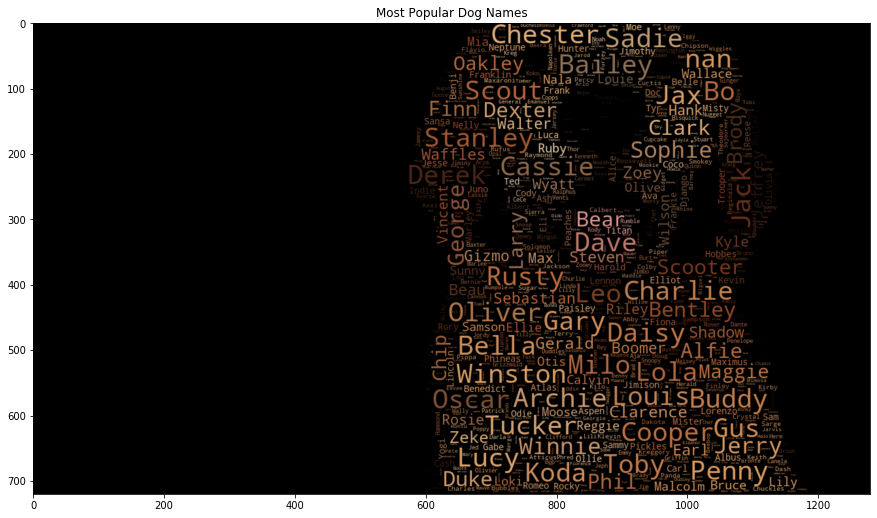

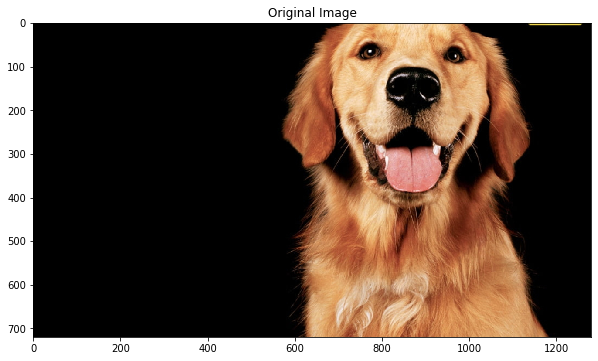

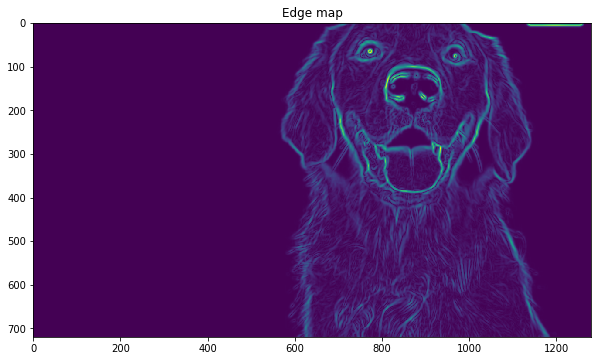

In [86]:
#This is the WordCloud Code from "https://amueller.github.io/word_cloud/auto_examples/parrot.html"

from PIL import Image

from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# load wikipedia text on rainbow
text = text

# load image. This has been modified in gimp to be brighter and have more saturation.
#Alice_color2 is the image we want to use as word Cloud
parrot_color = np.array(Image.open(os.path.join(d, "alice_color2.jpg")))
# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
parrot_color = parrot_color[::3, ::3]

# create mask  white is "masked out"
parrot_mask = parrot_color.copy()
parrot_mask[parrot_mask.sum(axis=2) == 0] = 255

# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(parrot_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
parrot_mask[edges > .08] = 255

# create wordcloud. A bit sluggish, you can subsample more strongly for quicker rendering
# relative_scaling=0 means the frequencies in the data are reflected less
# acurately but it makes a better picture
wc = WordCloud(max_words=2000, mask=parrot_mask, max_font_size=40, random_state=42, relative_scaling=0)

# generate word cloud
wc.generate(text)
plt.imshow(wc)

# create coloring from image
image_colors = ImageColorGenerator(parrot_color)
wc.recolor(color_func=image_colors)
plt.title("Most Popular Dog Names")
plt.figure(figsize=(15, 10))
plt.imshow(wc, interpolation="bilinear")
plt.title("Most Popular Dog Names")
wc.to_file("doggo.png")

plt.figure(figsize=(10, 10))
plt.title("Original Image")
plt.imshow(parrot_color)

plt.figure(figsize=(10, 10))
plt.title("Edge map")
plt.imshow(edges)
plt.show()

In [87]:
#Word Cloud for Dog Breeds

In [88]:
#Here I am extracting the top 40 dog breeds in each column
text1 = []
for i in test4.p1.value_counts()[:40].index:
    text1.append(i)
for i in test4.p2.value_counts()[:40].index:
    text1.append(i)
for i in test4.p3.value_counts()[:40].index:
    text1.append(i)
    
text1 = ' '.join(map(str, text1)) 

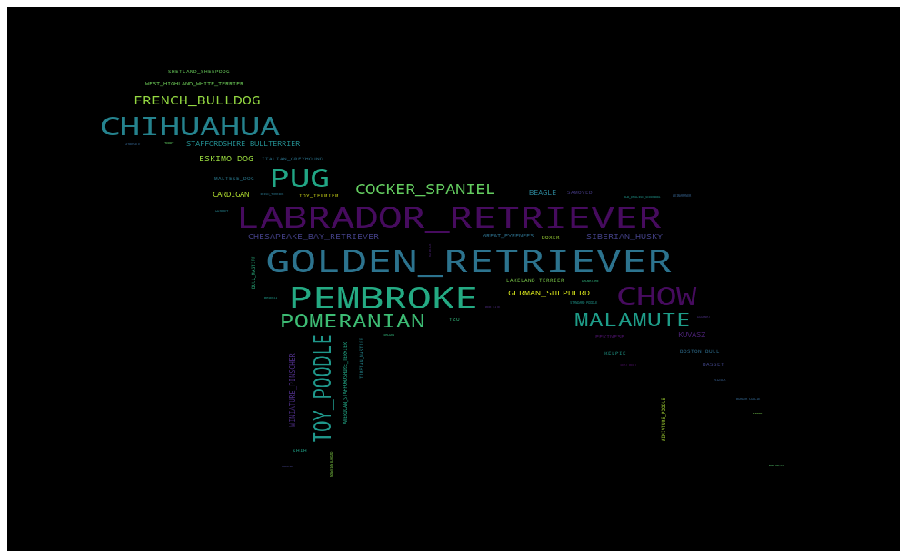

In [89]:
#Text-based word cloud code

import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random

from wordcloud import WordCloud, STOPWORDS


def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image taken from
# http://www.stencilry.org/stencils/movies/star%20wars/storm-trooper.gif
mask = np.array(Image.open(path.join(d, "alice.jpg")))

# movie script of "a new hope"
# http://www.imsdb.com/scripts/Star-Wars-A-New-Hope.html
# May the lawyers deem this fair use.
text = text1

# adding movie script specific stopwords
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=20, random_state=1).generate(text)

# store default colored image
default_colors = wc.to_array()

plt.figure(figsize = (16, 10))
plt.imshow(default_colors, interpolation="nearest", alpha=2, aspect='auto')
plt.axis("off")
plt.show()

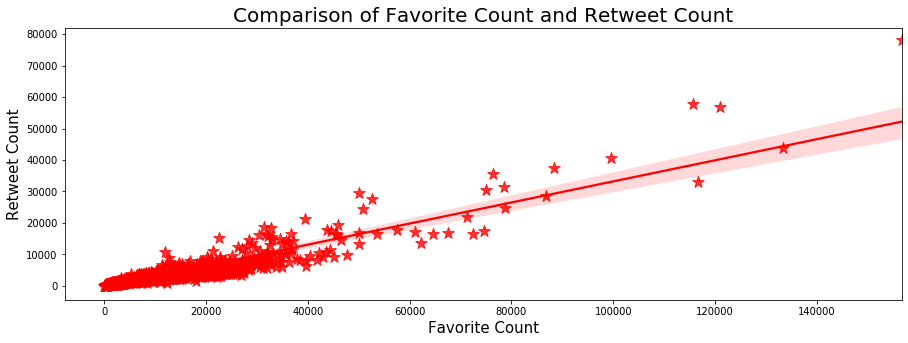

In [90]:
#Comparison of the relationship Favorite and Retweet count

params = {'figure.figsize': (15, 5), 'axes.labelsize':15, 'axes.titlesize':20}
plt.rcParams.update(params)
 
sns.regplot(test4.favorite_count, test4.retweet_count, color='Red', marker='*',  scatter_kws={"s": 150})

plt.title('Comparison of Favorite Count and Retweet Count')
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')

plt.show()

In [91]:
#Creating a new column "Aggregate Rating" to plot the trend of rating over time
a = []
b = []
d = []
c = 0
for i in test4.rating.values.tolist():
    a.append(str.split(i, sep='/'))
    b.append(float(a[c][0]))
    d.append(float(a[c][1]))
    c+=1

test4['new_rating_numerator'] = b
test4['new_rating_denominator'] = d

#Creating the column
test4['agg_rating'] = test4['new_rating_numerator'] / test4['new_rating_denominator']

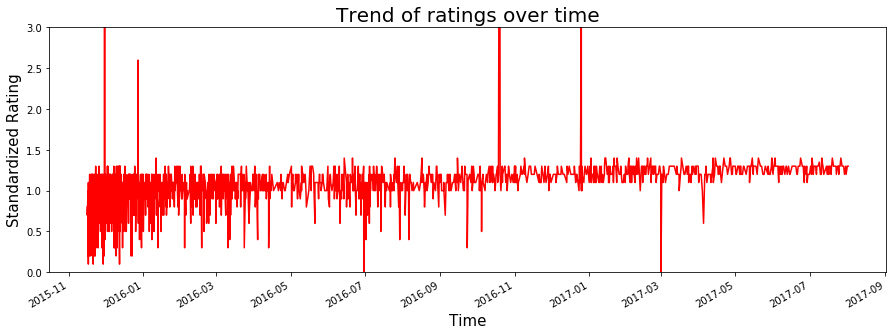

In [92]:
#Plotting the trend over time of Aggregate Rating, limiting Y axis between 0 and 3
test4.groupby(test6.timestamp)['agg_rating'].mean().plot(color="red")
plt.title('Trend of ratings over time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
plt.ylim(0, 3)
plt.show()